In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# CARGA DEL DATASET DEL VINO
SEED = 42
np.random.seed(SEED)

url_vino = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

columnas = ['acidez fija','acidez volátil','ácido cítrico','azúcar residual',
            'cloruros','dióxido de azufre libre','dióxido de azufre total',
            'densidad','pH','sulfatos','alcohol','calidad']
df_vino = pd.read_csv(url_vino, sep=';', names=columnas, header=0)

x = df_vino.drop('calidad', axis=1)
y = df_vino['calidad']

# Verificación de datos nulos
print(f'\nValores nulos en X: {np.isnan(x).sum().sum()}')
print(f'Valores nulos en y: {np.isnan(y).sum()}')


Valores nulos en X: 0
Valores nulos en y: 0


In [3]:
# Verificar si el dataset de vino está desbalanceado
# Porcentaje de cada clase
print("\nDistribución de clases (%):")
print((df_vino['calidad'].value_counts(normalize=True).sort_index() * 100).round(2))
print("El dataset esta desbalanceado porque las clases 5,6 abarcan el 80% de los datos")


Distribución de clases (%):
calidad
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: proportion, dtype: float64
El dataset esta desbalanceado porque las clases 5,6 abarcan el 80% de los datos


In [4]:
# División de datos: entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("\nDatos divididos correctamente")
print(f"Entrenamiento: {x_train.shape[0]} muestras")
print(f"Prueba: {x_test.shape[0]} muestras")


Datos divididos correctamente
Entrenamiento: 1119 muestras
Prueba: 480 muestras


In [5]:
# Escalamiento o estandarización
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Creación y entrenamiento del modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_train_scaled, y_train)
print("\nModelo KNN creado y entrenado")

# Predicciones
y_pred = modelo_knn.predict(x_test_scaled)
y_pred_proba = modelo_knn.predict_proba(x_test_scaled)


Modelo KNN creado y entrenado


In [7]:
# Evaluación del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión global: {precision:.4f} ({precision*100:.2f}%)")

print("\nREPORTE DE CLASIFICACIÓN")
print(classification_report(y_test, y_pred))


Precisión global: 0.5854 (58.54%)

REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.71      0.67       204
           6       0.55      0.59      0.57       192
           7       0.50      0.38      0.43        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.55      0.59      0.57       480



c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MATRIZ DE CONFUSIÓN
[[  0   0   1   2   0   0]
 [  0   0  11   5   0   0]
 [  0   0 144  57   3   0]
 [  0   1  58 114  19   0]
 [  0   0  11  26  23   0]
 [  0   0   0   4   1   0]]


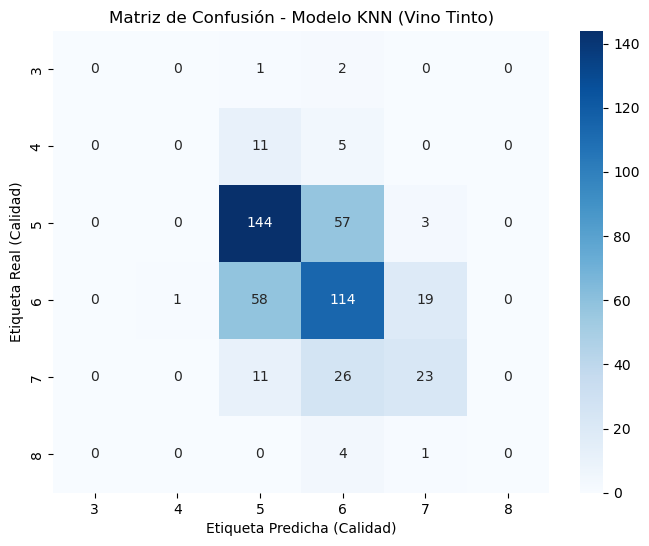

In [ ]:
# Matriz de confusión
print('\nMATRIZ DE CONFUSIÓN')
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("Matriz de Confusión - Modelo KNN (Vino)")
plt.ylabel('Etiqueta Real (Calidad)')
plt.xlabel('Etiqueta Predicha (Calidad)')
plt.show()